In [3]:
# Cell 1: Import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print(" Libraries loaded successfully!")

 Libraries loaded successfully!


In [4]:
train_features = pd.read_csv('data/train_hh_features.csv')
train_gt = pd.read_csv('data/train_hh_gt.csv')
train_rates = pd.read_csv('data/train_rates_gt.csv')
test_features = pd.read_csv('data/test_hh_features.csv')
feature_desc = pd.read_csv('data/feature_descriptions.csv')
feature_values = pd.read_csv('data/feature_value_descriptions.csv')

In [5]:
print(" Data loaded successfully!")
print(f"\n Training features: {train_features.shape}")
print(f" Training ground truth: {train_gt.shape}")
print(f" Training poverty rates: {train_rates.shape}")
print(f" Test features: {test_features.shape}")
print(f" Feature descriptions: {feature_desc.shape}")
print(f" Feature values: {feature_values.shape}")

 Data loaded successfully!

 Training features: (104234, 88)
 Training ground truth: (104234, 3)
 Training poverty rates: (3, 20)
 Test features: (103023, 88)
 Feature descriptions: (108, 3)
 Feature values: (179, 4)


In [6]:
print(" First 5 rows of training features:")
print(train_features.head())

print("\n" + "="*50)
print(" Column names and data types:")
print(train_features.dtypes)

print("\n" + "="*50)
print(" Basic statistics:")
print(train_features.describe())

 First 5 rows of training features:
     hhid  com  weight  strata  utl_exp_ppp17    male  hsize  num_children5  \
0  100001    1      75       4      594.80627  Female      1              0   
1  100002    1     150       4     1676.27230  Female      2              0   
2  100003    1     375       4      506.93719    Male      5              0   
3  100004    1     375       4      824.61786    Male      5              0   
4  100005    1     525       4      351.47644    Male      7              1   

   num_children10  num_children18  age      owner   water  toilet   sewer  \
0               0               0   75      Owner  Access  Access  Access   
1               0               0   61      Owner  Access  Access  Access   
2               0               2   49      Owner  Access  Access  Access   
3               0               1   58  Not owner  Access  Access  Access   
4               0               0   57      Owner  Access  Access  Access   

       elect              

In [7]:
# Cell 4: Explore the target variable (consumption)
print(" First 5 rows of training ground truth:")
print(train_gt.head())

print("\n" + "="*50)
print(" Columns in ground truth:")
print(train_gt.columns.tolist())

print("\n" + "="*50)
print(" Statistics of consumption values:")
print(train_gt.describe())

print("\n" + "="*50)
print(" Check for missing values:")
print(train_gt.isnull().sum())

 First 5 rows of training ground truth:
   survey_id    hhid  cons_ppp17
0     100000  100001   25.258402
1     100000  100002   16.996706
2     100000  100003   13.671848
3     100000  100004    7.189475
4     100000  100005   12.308855

 Columns in ground truth:
['survey_id', 'hhid', 'cons_ppp17']

 Statistics of consumption values:
           survey_id           hhid     cons_ppp17
count  104234.000000  104234.000000  104234.000000
mean   205059.769365  222499.501497      11.555229
std     81587.641825   83279.120172      10.034225
min    100000.000000  100001.000000       0.359563
25%    100000.000000  126059.250000       5.439294
50%    200000.000000  219929.500000       8.774002
75%    300000.000000  311403.750000      14.216931
max    300000.000000  337462.000000     236.115680

 Check for missing values:
survey_id     0
hhid          0
cons_ppp17    0
dtype: int64


survey_id: Different surveys (100000, 200000, 300000) - probably different countries or time periods
hhid: Household ID (unique identifier)
cons_ppp17:  THIS IS OUR TARGET! Daily per capita consumption in PPP 2017 dollars

Average: ~$11.56/day
Range: $0.36 to $236/day (huge variation!)
No missing values 

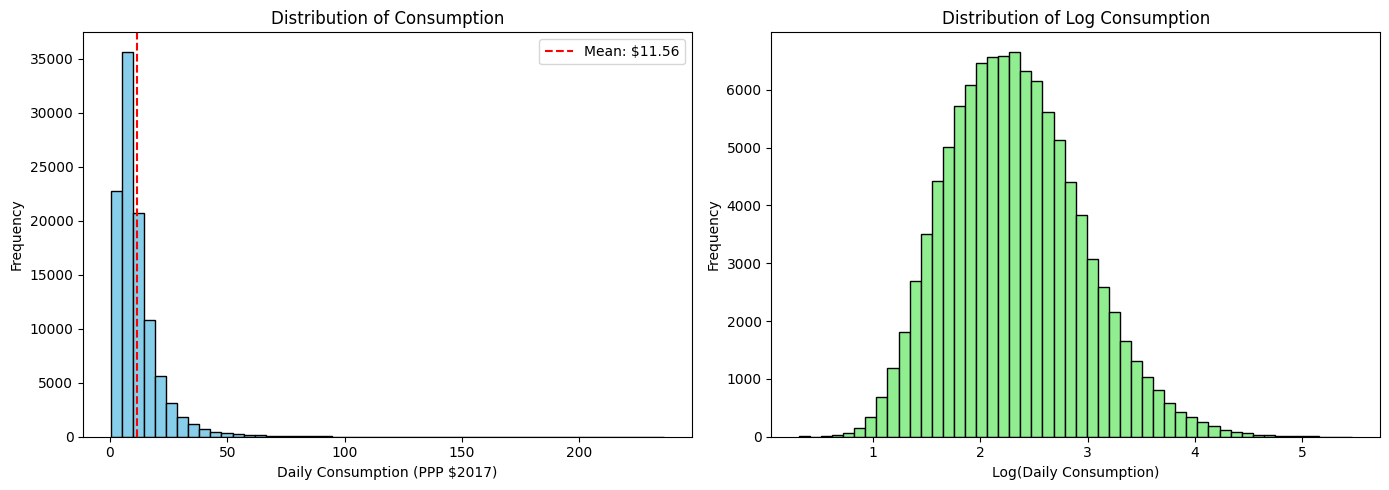

 Consumption range: $0.36 to $236.12
 Median: $8.77


In [8]:
# Cell 5: Visualize consumption distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(train_gt['cons_ppp17'], bins=50, color='skyblue', edgecolor='black')
axes[0].set_xlabel('Daily Consumption (PPP $2017)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Consumption')
axes[0].axvline(train_gt['cons_ppp17'].mean(), color='red', linestyle='--', label=f'Mean: ${train_gt["cons_ppp17"].mean():.2f}')
axes[0].legend()

# Log scale (easier to see)
axes[1].hist(np.log1p(train_gt['cons_ppp17']), bins=50, color='lightgreen', edgecolor='black')
axes[1].set_xlabel('Log(Daily Consumption)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Log Consumption')

plt.tight_layout()
plt.show()

print(f" Consumption range: ${train_gt['cons_ppp17'].min():.2f} to ${train_gt['cons_ppp17'].max():.2f}")
print(f" Median: ${train_gt['cons_ppp17'].median():.2f}")

The data is very skewed (most people have low consumption, few have very high).

 Consumption statistics by survey:
           count       mean    median       min        max
survey_id                                                 
100000     32188  11.287522  8.572003  0.359563  173.53967
200000     34584  11.649289  8.882855  0.502858  202.68829
300000     37462  11.698415  8.844429  0.821311  236.11568



<Figure size 1000x600 with 0 Axes>

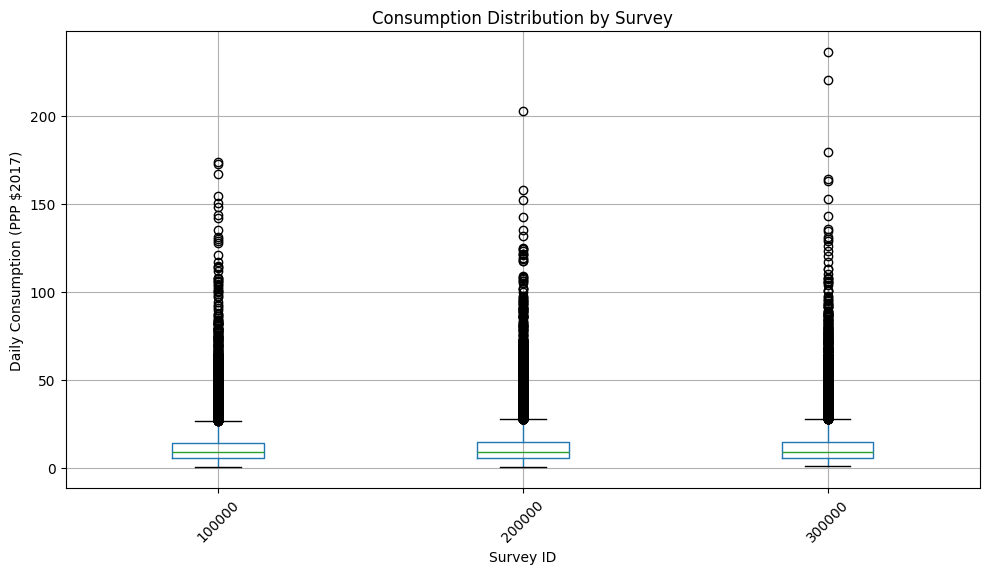

In [9]:
# Cell 6: Compare consumption across different surveys
print(" Consumption statistics by survey:")
print(train_gt.groupby('survey_id')['cons_ppp17'].agg(['count', 'mean', 'median', 'min', 'max']))

print("\n" + "="*50)

# Visualize
plt.figure(figsize=(10, 6))
train_gt.boxplot(column='cons_ppp17', by='survey_id', figsize=(10, 6))
plt.suptitle('')
plt.title('Consumption Distribution by Survey')
plt.xlabel('Survey ID')
plt.ylabel('Daily Consumption (PPP $2017)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

All three surveys look very similar - lots of outliers (rich households) but median consumption is around $10-15 for all.

In [10]:
# Cell 7: Explore the feature columns
print(" Training features shape:", train_features.shape)
print("\n First few column names:")
print(train_features.columns[:20].tolist())

print("\n" + "="*50)
print(" Data types of features:")
print(train_features.dtypes.value_counts())

print("\n" + "="*50)
print(" Missing values in features:")
missing = train_features.isnull().sum()
missing_pct = (missing / len(train_features) * 100).round(2)
missing_df = pd.DataFrame({'Missing': missing, 'Percent': missing_pct})
missing_df = missing_df[missing_df['Missing'] > 0].sort_values('Missing', ascending=False)
print(missing_df.head(20))

print(f"\n Total features with missing values: {len(missing_df)}")

 Training features shape: (104234, 88)

 First few column names:
['hhid', 'com', 'weight', 'strata', 'utl_exp_ppp17', 'male', 'hsize', 'num_children5', 'num_children10', 'num_children18', 'age', 'owner', 'water', 'toilet', 'sewer', 'elect', 'water_source', 'sanitation_source', 'dweltyp', 'num_adult_female']

 Data types of features:
object     64
int64      20
float64     4
Name: count, dtype: int64

 Missing values in features:
               Missing  Percent
sector1d         14129    13.56
dweltyp           1206     1.16
utl_exp_ppp17       85     0.08
consumed5000        66     0.06
consumed4600        56     0.05
consumed4900        56     0.05
consumed4800        56     0.05
consumed4500        54     0.05
consumed4400        52     0.05
consumed4700        52     0.05
consumed4300        52     0.05
employed            45     0.04
consumed4200        44     0.04
consumed3900        40     0.04
consumed4100        40     0.04
consumed4000        38     0.04
consumed3800        35 

In [11]:
# Cell 8: Look at feature descriptions
print(" Feature Descriptions:")
print(feature_desc.head(10))

print("\n" + "="*50)
print(f" Total features described: {len(feature_desc)}")

print("\n" + "="*50)
print(" Let's see what some common features mean:")
common_features = ['male', 'hsize', 'age', 'owner', 'water', 'toilet', 'elect']
for feat in common_features:
    if feat in feature_desc['feature'].values:
        desc = feature_desc[feature_desc['feature'] == feat]['description'].values[0]
        print(f"  • {feat}: {desc}")

 Feature Descriptions:
   Variable name Storage type  \
0         sample         str8   
1           hhid          int   
2            com         byte   
3         weight          int   
4         strata         byte   
5     cons_ppp17        float   
6  utl_exp_ppp17        float   
7           male         byte   
8          hsize         byte   
9  num_children5         byte   

                                      Variable label  
0                                          Data Type  
1                        Household unique identifier  
2                     Identifier of household member  
3                          Household sampling weight  
4                            Stratification variable  
5  Target variable: Per-capita daily expenditure ...  
6                   Expenditure on utilities (PPP17)  
7                             Household head is male  
8                Number of members in main household  
9          Number of children (under 5) in household  

 Total 

KeyError: 'feature'

In [12]:
# Cell 8 (Fixed): Look at feature descriptions
print("📖 Feature Descriptions columns:")
print(feature_desc.columns.tolist())

print("\n" + "="*50)
print("📖 First 10 rows:")
print(feature_desc.head(10))

print("\n" + "="*50)
print(f"📊 Total rows in feature descriptions: {len(feature_desc)}")

📖 Feature Descriptions columns:
['Variable name', 'Storage type', 'Variable label']

📖 First 10 rows:
   Variable name Storage type  \
0         sample         str8   
1           hhid          int   
2            com         byte   
3         weight          int   
4         strata         byte   
5     cons_ppp17        float   
6  utl_exp_ppp17        float   
7           male         byte   
8          hsize         byte   
9  num_children5         byte   

                                      Variable label  
0                                          Data Type  
1                        Household unique identifier  
2                     Identifier of household member  
3                          Household sampling weight  
4                            Stratification variable  
5  Target variable: Per-capita daily expenditure ...  
6                   Expenditure on utilities (PPP17)  
7                             Household head is male  
8                Number of members in m

In [13]:
# Cell 9: Explore feature descriptions properly
print("🔍 Let's see what some common features mean:\n")

common_features = ['male', 'hsize', 'age', 'owner', 'water', 'toilet', 'elect', 'num_children5']

for feat in common_features:
    match = feature_desc[feature_desc['Variable name'] == feat]
    if not match.empty:
        label = match['Variable label'].values[0]
        print(f"  • {feat:15} → {label}")

print("\n" + "="*50)
print("\n📊 All feature categories (first 30):")
print(feature_desc[['Variable name', 'Variable label']].head(30).to_string(index=False))

🔍 Let's see what some common features mean:

  • male            → Household head is male
  • hsize           → Number of members in main household
  • age             → Age of household head
  • owner           → Owner of dwelling?
  • water           → Does the dwelling have access to a water supply system?
  • toilet          → Are there toilet facilities in the dwelling?
  • elect           → Does the dwelling have access to electricity?
  • num_children5   → Number of children (under 5) in household


📊 All feature categories (first 30):
    Variable name                                            Variable label
           sample                                                 Data Type
             hhid                               Household unique identifier
              com                            Identifier of household member
           weight                                 Household sampling weight
           strata                                   Stratification vari

In [14]:
# Cell 10: Merge features with target variable
# Join train_features with train_gt on hhid
train_data = train_features.merge(train_gt[['hhid', 'cons_ppp17']], on='hhid', how='left')

print(" Merged training data shape:", train_data.shape)
print("\n Check if merge was successful:")
print(f"  • Rows with target: {train_data['cons_ppp17'].notna().sum()}")
print(f"  • Rows without target: {train_data['cons_ppp17'].isna().sum()}")

print("\n First few rows:")
print(train_data[['hhid', 'hsize', 'age', 'male', 'elect', 'cons_ppp17']].head(10))

 Merged training data shape: (104234, 89)

 Check if merge was successful:
  • Rows with target: 104234
  • Rows without target: 0

 First few rows:
     hhid  hsize  age    male      elect  cons_ppp17
0  100001      1   75  Female     Access   25.258402
1  100002      2   61  Female     Access   16.996706
2  100003      5   49    Male     Access   13.671848
3  100004      5   58    Male  No access    7.189475
4  100005      7   57    Male     Access   12.308855
5  100006      2   79  Female     Access    4.496972
6  100007      6   65    Male     Access   23.149488
7  100008      4   68    Male     Access   18.026398
8  100009      6   70    Male     Access    5.346746
9  100010      3   72  Female     Access    6.537404


In [15]:
# Cell 11: Identify feature types
# Get all columns except identifiers and target
exclude_cols = ['hhid', 'cons_ppp17', 'weight', 'strata']
feature_cols = [col for col in train_data.columns if col not in exclude_cols]

print(f" Total feature columns: {len(feature_cols)}")

# Separate numeric and categorical
numeric_features = train_data[feature_cols].select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = train_data[feature_cols].select_dtypes(include=['object']).columns.tolist()

print(f"\n Numeric features: {len(numeric_features)}")
print(f" Categorical features: {len(categorical_features)}")

print(f"\n First 10 numeric features:")
print(numeric_features[:10])

print(f"\n First 10 categorical features:")
print(categorical_features[:10])

 Total feature columns: 85

 Numeric features: 21
 Categorical features: 64

 First 10 numeric features:
['com', 'utl_exp_ppp17', 'hsize', 'num_children5', 'num_children10', 'num_children18', 'age', 'num_adult_female', 'num_adult_male', 'num_elderly']

 First 10 categorical features:
['male', 'owner', 'water', 'toilet', 'sewer', 'elect', 'water_source', 'sanitation_source', 'dweltyp', 'employed']
